<a href="https://colab.research.google.com/github/Sina-Khan/EURUSD_Analysis/blob/main/EURUSD_Fibonacci_RSI_SMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# EUR/USD Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import files
files.upload()

Saving EURUSD_Daily_20060102_20230131.csv to EURUSD_Daily_20060102_20230131.csv


{'EURUSD_Daily_20060102_20230131.csv': b'DATE,OPEN,HIGH,LOW,CLOSE,TICKVOL\r\n2006.01.02,1.1849,1.1869,1.1801,1.1821,5870\r\n2006.01.03,1.1822,1.2033,1.181,1.2015,9455\r\n2006.01.04,1.2014,1.2146,1.2012,1.2108,10123\r\n2006.01.05,1.2107,1.2123,1.2065,1.2097,9584\r\n2006.01.06,1.2101,1.2182,1.2078,1.2143,9219\r\n2006.01.09,1.2143,1.2155,1.2051,1.2081,9512\r\n2006.01.10,1.208,1.2112,1.2036,1.2061,9977\r\n2006.01.11,1.2061,1.2146,1.2043,1.2141,9534\r\n2006.01.12,1.2139,1.2165,1.2007,1.2033,9787\r\n2006.01.13,1.2032,1.215,1.2028,1.2115,9358\r\n2006.01.16,1.2153,1.2176,1.2104,1.2116,8758\r\n2006.01.17,1.2115,1.2145,1.205,1.2117,9573\r\n2006.01.18,1.2114,1.2161,1.2069,1.2119,9745\r\n2006.01.19,1.2116,1.2127,1.2053,1.2091,9413\r\n2006.01.20,1.2091,1.2143,1.204,1.2136,9066\r\n2006.01.23,1.2143,1.2314,1.2141,1.2297,10429\r\n2006.01.24,1.2296,1.2323,1.2256,1.2269,9694\r\n2006.01.25,1.227,1.2324,1.2234,1.2242,10122\r\n2006.01.26,1.2243,1.2273,1.2198,1.2202,9953\r\n2006.01.27,1.2206,1.2238,1.2086,1

In [ ]:
df = pd.read_csv('EURUSD_Daily_20060102_20230131.csv')
df = df.set_index(pd.DatetimeIndex(df['DATE'].values))
df

,DATE,OPEN,HIGH,LOW,CLOSE,TICKVOL
2006-01-02,2006.01.02,1.18490,1.18690,1.18010,1.18210,5870
2006-01-03,2006.01.03,1.18220,1.20330,1.18100,1.20150,9455
2006-01-04,2006.01.04,1.20140,1.21460,1.20120,1.21080,10123
2006-01-05,2006.01.05,1.21070,1.21230,1.20650,1.20970,9584
2006-01-06,2006.01.06,1.21010,1.21820,1.20780,1.21430,9219
...,...,...,...,...,...,...
2023-01-25,2023.01.25,1.08856,1.09236,1.08574,1.09147,89198
2023-01-26,2023.01.26,1.09152,1.09294,1.08506,1.08917,84384
2023-01-27,2023.01.27,1.08909,1.09003,1.08378,1.08673,79737
2023-01-30,2023.01.30,1.08618,1.09138,1.08393,1.08500,84809


In [ ]:
df.describe()

,OPEN,HIGH,LOW,CLOSE,TICKVOL
count,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000
mean,1.244927,1.250299,1.239735,1.244941,67089.029757
std,0.132324,0.133068,0.131321,0.132269,44319.754364
min,0.959230,0.967110,0.953570,0.959240,1.000000
25%,1.128815,1.133167,1.124650,1.128658,36182.500000
50%,1.235795,1.240380,1.229525,1.235645,60326.000000
75%,1.345957,1.351908,1.341175,1.345885,91149.000000
max,1.599500,1.603800,1.586600,1.599700,308719.000000


In [ ]:
# Candlestick Chart
fig = go.Figure(data=[go.Candlestick(
    x = df.index,
    open = df['OPEN'],
    close = df['CLOSE'],
    high = df['HIGH'],
    low = df['LOW'],
    increasing_line_color = 'green',
    decreasing_line_color = 'red'
)])

fig.show()

In [ ]:
# Fibonacci retracement levels
max_price = df['CLOSE'].max()
min_price = df['CLOSE'].min()
difference = max_price - min_price
first_level = max_price - difference * 0.236
second_level = max_price - difference * 0.382
third_level = max_price - difference * 0.5
fourth_level = max_price - difference * 0.618

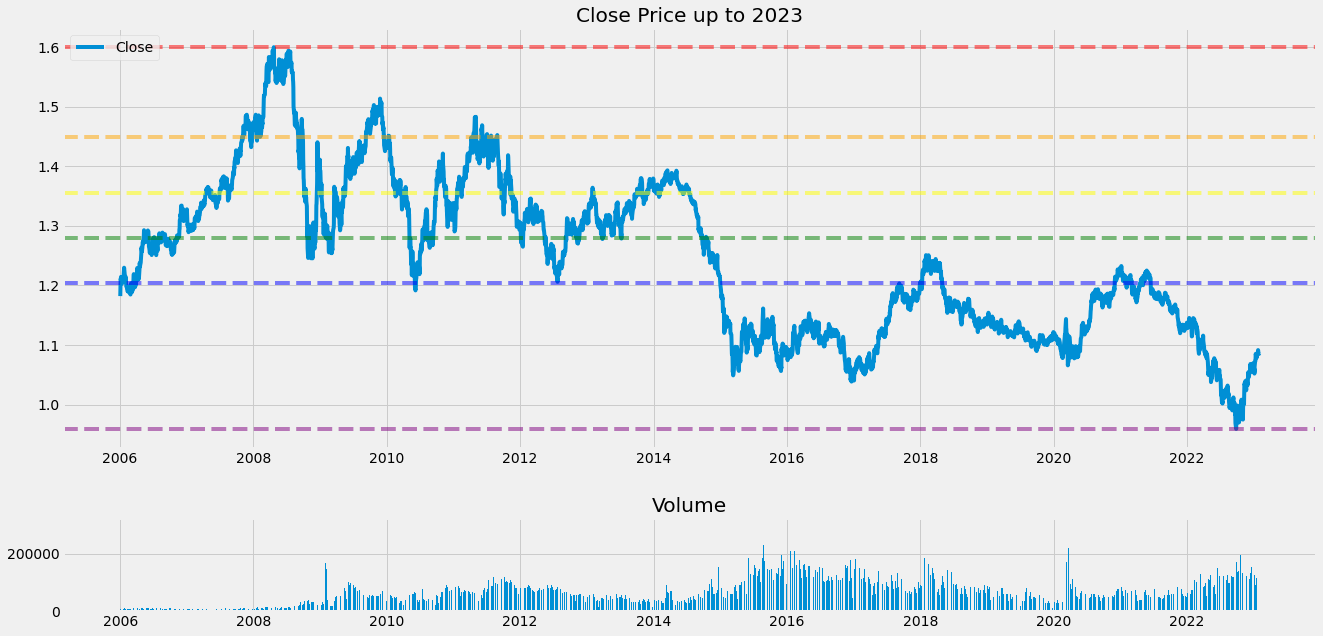

In [ ]:
# Plot Fibonacci levels
top = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
top.plot(df.index, df['CLOSE'], label='Close')
top.axhline(max_price, linestyle='--', alpha=0.5, color='red')
top.axhline(first_level, linestyle='--', alpha=0.5, color='orange')
top.axhline(second_level, linestyle='--', alpha=0.5, color='yellow')
top.axhline(third_level, linestyle='--', alpha=0.5, color='green')
top.axhline(fourth_level, linestyle='--', alpha=0.5, color='blue')
top.axhline(min_price, linestyle='--', alpha=0.5, color='purple')
plt.title('Close Price up to 2023')
plt.legend(loc='upper left')
# Plot Volume
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
plt.title('Volume')
bottom.bar(df.index, df['TICKVOL'])
plt.subplots_adjust(hspace=0.75)
plt.gcf().set_size_inches(20,10)

In [ ]:
# Calculate the daily simple returns
DSR = df['CLOSE'].pct_change(1)
DSR

2006-01-02         NaN
2006-01-03    0.016411
2006-01-04    0.007740
2006-01-05   -0.000908
2006-01-06    0.003803
                ...   
2023-01-25    0.002461
2023-01-26   -0.002107
2023-01-27   -0.002240
2023-01-30   -0.001592
2023-01-31    0.001051
Name: CLOSE, Length: 4436, dtype: float64

In [ ]:
DSR.describe()

count    4435.000000
mean       -0.000002
std         0.005762
min        -0.026604
25%        -0.003199
50%         0.000080
75%         0.003154
max         0.034903
Name: CLOSE, dtype: float64

(array([12418., 13149., 13879., 14610., 15340., 16071., 16801., 17532.,
        18262., 18993., 19723.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

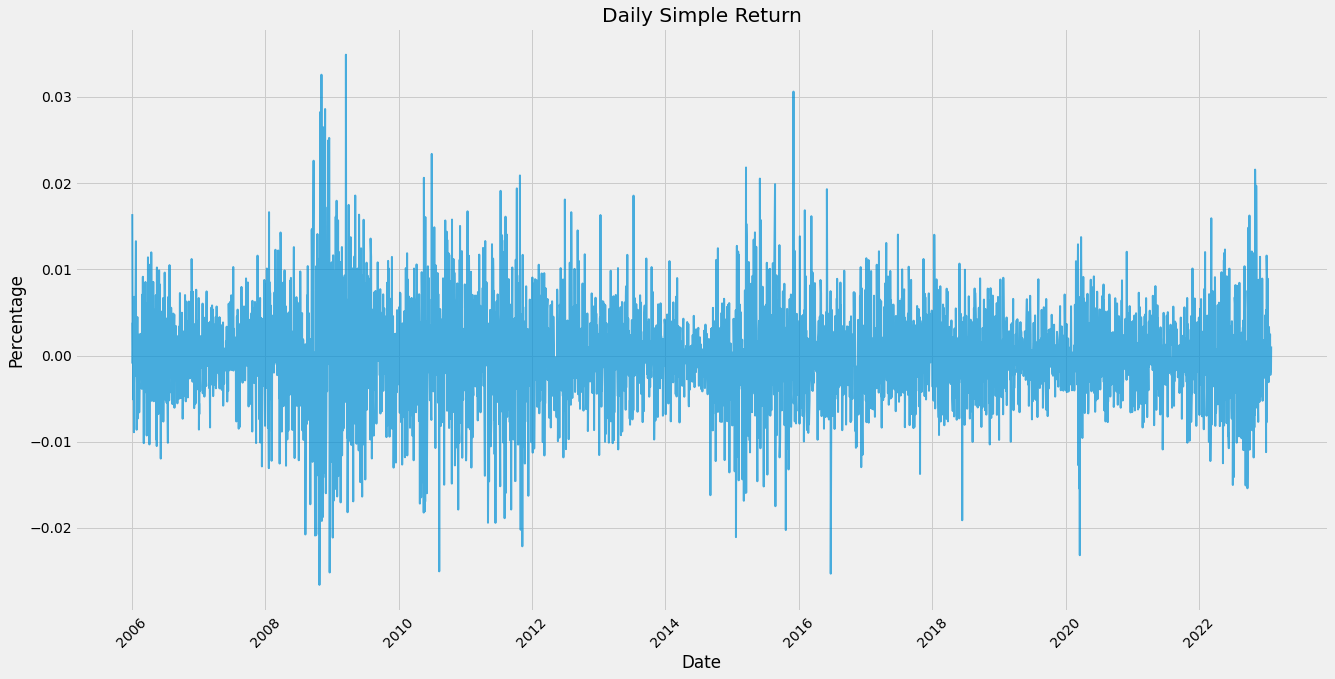

In [ ]:
# Plot DSR
plt.figure(figsize=(20,10))
plt.plot(DSR.index, DSR, label='Close', lw=2, alpha=0.7)
plt.title('Daily Simple Return')
plt.ylabel('Percentage')
plt.xlabel('Date')
plt.xticks(rotation=45)

In [ ]:
# RSI
delta = df['CLOSE'].diff(1)
delta = delta.dropna()
up = delta.copy()
down = delta.copy()
up[up<0] = 0
down[down>0] = 0
time_period = 14
AVG_Gain = up.rolling(window=time_period).mean()
AVG_Loss = abs(down.rolling(window=time_period).mean())
RS = AVG_Gain / AVG_Loss
RSI = 100 - (100 / (1 + RS))

In [ ]:
# Calculate the 200 day SMA
SMA200 = df['CLOSE'].rolling(window=200).mean()
df['SMA200'] = SMA200

<AxesSubplot:>

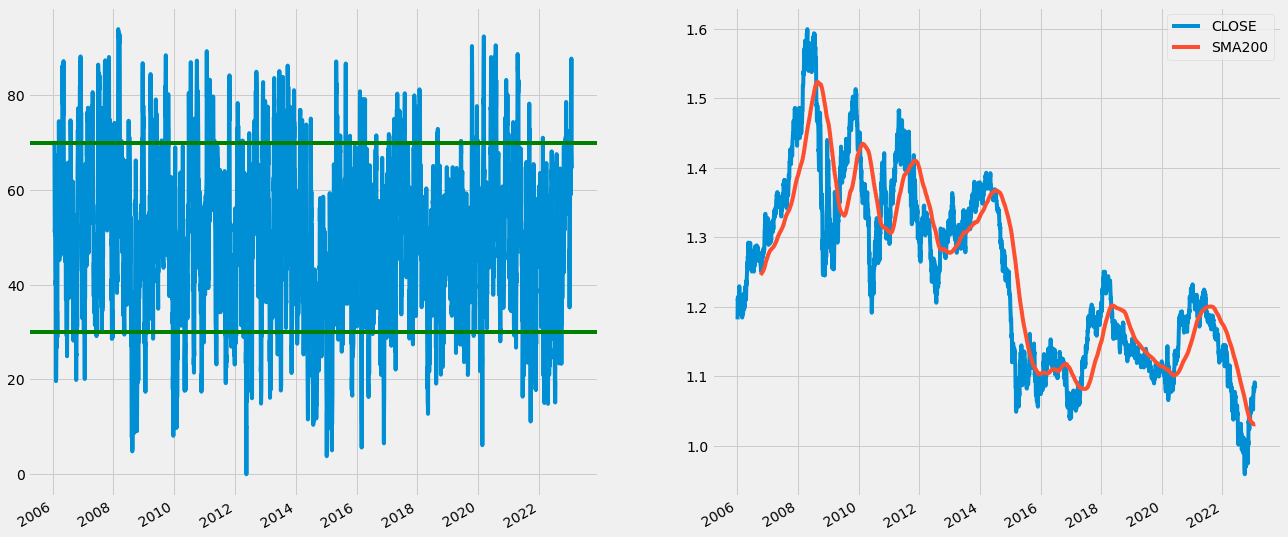

In [ ]:
# Plot RSI ans SMA
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax0 = RSI.plot(ax=ax[0])
ax0.axhline(30, color = 'green')
ax0.axhline(70, color = 'green')

df[['CLOSE', 'SMA200']].plot(ax=ax[1])